# Using KNN in Python

In [2]:
# By now, you should be used to importing all the following libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches%matplotlib inline
# The operator module exports a set of efficient functions corresponding to the intrinsic operators of Python. 
# For example, operator.add(x, y) is equivalent to the expression x+y. 
# It is NOT essential for kNN to import the operator library, however, it does make our life a little easier.
import operator


In [40]:
# We will be using Scikit-Learn’s KNeighborsClassifier Class for KNN
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier

# The iris data set comes with scikit's datasets library
iris = datasets.load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [36]:
# In this lab, we will use the first two features of the data set 
X = iris.data[:, :2]      
X


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [37]:
# And we will use the target attribute in the original data set as our class label
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

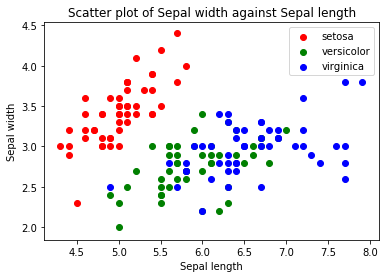

In [38]:
# Plot the points
colors = ['red', 'green', 'blue']
# I packed lots of stuff in the following command: basically, we will rotate through the three y classes, 0, 1 and 2
# For each class, we will use a different color to plot the x and y's of the data points that belong to this class
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()


### Exploring Different Values of K

In [54]:
k = 1
#instantiate learning model with k = 1
knn = KNeighborsClassifier(n_neighbors=k)

#fitting the model with X as the input and y as the label
knn.fit(X, y)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
# We will now try to plot the kNN map. 
# Step 1: Build a mesh with ALL points in the mesh assigned to class labels based on our kNN "voting"

# min and max for the first feature - we need them to build the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

# min and max for the second feature
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# step size in the mesh
h = (x_max / x_min)/100

# We now generate the x and y coordinates for our mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

print(xx)
print(yy)

[[3.3        3.3269697  3.35393939 ... 8.82878788 8.85575758 8.88272727]
 [3.3        3.3269697  3.35393939 ... 8.82878788 8.85575758 8.88272727]
 [3.3        3.3269697  3.35393939 ... 8.82878788 8.85575758 8.88272727]
 ...
 [3.3        3.3269697  3.35393939 ... 8.82878788 8.85575758 8.88272727]
 [3.3        3.3269697  3.35393939 ... 8.82878788 8.85575758 8.88272727]
 [3.3        3.3269697  3.35393939 ... 8.82878788 8.85575758 8.88272727]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.0269697  1.0269697  1.0269697  ... 1.0269697  1.0269697  1.0269697 ]
 [1.05393939 1.05393939 1.05393939 ... 1.05393939 1.05393939 1.05393939]
 ...
 [5.34212121 5.34212121 5.34212121 ... 5.34212121 5.34212121 5.34212121]
 [5.36909091 5.36909091 5.36909091 ... 5.36909091 5.36909091 5.36909091]
 [5.39606061 5.39606061 5.39606061 ... 5.39606061 5.39606061 5.39606061]]


In [56]:
# We predict the class each point in the mesh belongs to
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array([1, 1, 1, ..., 2, 2, 2])

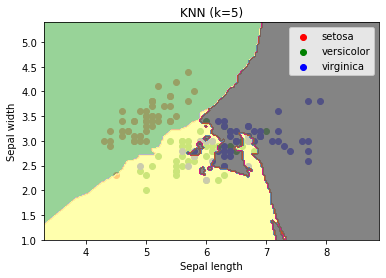

In [57]:
# plot the training points
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Draw the result using a color plot 
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

### Parameter-Tuning K

In [58]:
from sklearn.model_selection import cross_val_score

# holds the cv (cross-validates) scores
cv_scores = []

# use all features
X = iris.data[:, :4]
y = iris.target

# number of folds 
folds = 10

# creating odd list of K for KNN 
ks = list(range(1,int(len(X) * ((folds - 1)/folds))))


# remove all multiples of 3
ks = [k for k in ks if k % 3 != 0]
print(ks)

#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)

    #---performs cross-validation and returns the average accuracy---
    scores = cross_val_score(knn, X, y, cv=folds, scoring='accuracy')
    mean = scores.mean()
    cv_scores.append(mean)
    print(k, mean)


[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110, 112, 113, 115, 116, 118, 119, 121, 122, 124, 125, 127, 128, 130, 131, 133, 134]
1 0.96
2 0.9533333333333334
4 0.9666666666666666
5 0.9666666666666668
7 0.9666666666666668
8 0.9666666666666668
10 0.9666666666666668
11 0.9666666666666668
13 0.9800000000000001
14 0.9733333333333334
16 0.9733333333333334
17 0.9733333333333334
19 0.9733333333333334
20 0.9800000000000001
22 0.9666666666666666
23 0.9733333333333334
25 0.9666666666666666
26 0.96
28 0.9533333333333334
29 0.9533333333333334
31 0.9466666666666667
32 0.9466666666666667
34 0.9466666666666667
35 0.9466666666666667
37 0.9466666666666667
38 0.9466666666666667
40 0.9533333333333334
41 0.9533333333333334
43 0.9466666666666667
44 0.940000000000

### Finding the Optimal K

The optimal number of neighbors is 13


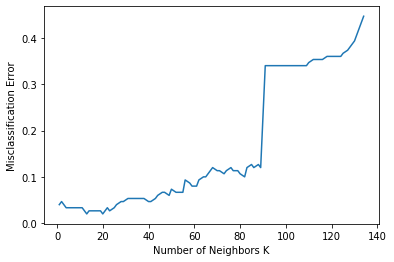

In [59]:
#---calculate misclassification error for each k---
MSE = [1 - x for x in cv_scores]

#---determining best k (min. MSE)---
optimal_k = ks[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")

#---plot misclassification error vs k---
plt.plot(ks, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
